## RNN/GRU for Time Series Prediction for Milk Production Prediction

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the Dataset
data = pd.read_csv('./dataset/monthly-milk-production.csv', index_col='Month')

In [3]:
# Analyze Dataset
data.head()

,Milk Production
Month,
1/1/1962 1:00,589
2/1/1962 1:00,561
3/1/1962 1:00,640
4/1/1962 1:00,656
5/1/1962 1:00,727


In [4]:
# Preprocess the Data
data.index = pd.to_datetime(data.index)

In [5]:
# Data after Preprocessing
data.head()

,Milk Production
Month,
1962-01-01 01:00:00,589
1962-02-01 01:00:00,561
1962-03-01 01:00:00,640
1962-04-01 01:00:00,656
1962-05-01 01:00:00,727


In [6]:
data.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


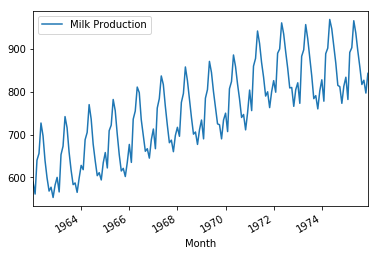

In [7]:
# Plot Dataset
data.plot()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


In [9]:
# Train Test Split
# Total Number of Rows: 168
# All except last 12: 168-12 = 156
train_data = data.head(156)
print(train_data)

                     Milk Production
Month                               
1962-01-01 01:00:00              589
1962-02-01 01:00:00              561
1962-03-01 01:00:00              640
1962-04-01 01:00:00              656
1962-05-01 01:00:00              727
1962-06-01 01:00:00              697
1962-07-01 01:00:00              640
1962-08-01 01:00:00              599
1962-09-01 01:00:00              568
1962-10-01 01:00:00              577
1962-11-01 01:00:00              553
1962-12-01 01:00:00              582
1963-01-01 01:00:00              600
1963-02-01 01:00:00              566
1963-03-01 01:00:00              653
1963-04-01 01:00:00              673
1963-05-01 01:00:00              742
1963-06-01 01:00:00              716
1963-07-01 01:00:00              660
1963-08-01 01:00:00              617
1963-09-01 01:00:00              583
1963-10-01 01:00:00              587
1963-11-01 01:00:00              565
1963-12-01 01:00:00              598
1964-01-01 01:00:00              628
1

In [10]:
test_data = data.tail(12)
print(test_data)

                     Milk Production
Month                               
1975-01-01 01:00:00              834
1975-02-01 01:00:00              782
1975-03-01 01:00:00              892
1975-04-01 01:00:00              903
1975-05-01 01:00:00              966
1975-06-01 01:00:00              937
1975-07-01 01:00:00              896
1975-08-01 01:00:00              858
1975-09-01 01:00:00              817
1975-10-01 01:00:00              827
1975-11-01 01:00:00              797
1975-12-01 01:00:00              843


In [11]:
# Scale Data
scl = MinMaxScaler()
scaled_train = scl.fit_transform(train_data)
scaled_test = scl.transform(test_data)

In [12]:
print('Scaled Training Data: \n',scaled_train)

Scaled Training Data: 
 [[ 0.08653846]
 [ 0.01923077]
 [ 0.20913462]
 [ 0.24759615]
 [ 0.41826923]
 [ 0.34615385]
 [ 0.20913462]
 [ 0.11057692]
 [ 0.03605769]
 [ 0.05769231]
 [ 0.        ]
 [ 0.06971154]
 [ 0.11298077]
 [ 0.03125   ]
 [ 0.24038462]
 [ 0.28846154]
 [ 0.45432692]
 [ 0.39182692]
 [ 0.25721154]
 [ 0.15384615]
 [ 0.07211538]
 [ 0.08173077]
 [ 0.02884615]
 [ 0.10817308]
 [ 0.18028846]
 [ 0.15625   ]
 [ 0.32451923]
 [ 0.36538462]
 [ 0.52163462]
 [ 0.43990385]
 [ 0.30048077]
 [ 0.20673077]
 [ 0.12259615]
 [ 0.13942308]
 [ 0.09855769]
 [ 0.19471154]
 [ 0.25240385]
 [ 0.16586538]
 [ 0.375     ]
 [ 0.40625   ]
 [ 0.55048077]
 [ 0.48798077]
 [ 0.35817308]
 [ 0.24038462]
 [ 0.14903846]
 [ 0.16346154]
 [ 0.11778846]
 [ 0.19711538]
 [ 0.29807692]
 [ 0.19711538]
 [ 0.43990385]
 [ 0.48557692]
 [ 0.62019231]
 [ 0.58894231]
 [ 0.4375    ]
 [ 0.34615385]
 [ 0.25961538]
 [ 0.27403846]
 [ 0.22115385]
 [ 0.32451923]
 [ 0.38461538]
 [ 0.27403846]
 [ 0.50240385]
 [ 0.55528846]
 [ 0.68269231]
 

In [13]:
print('Scaled Test Data: \n',scaled_test)

Scaled Test Data: 
 [[ 0.67548077]
 [ 0.55048077]
 [ 0.81490385]
 [ 0.84134615]
 [ 0.99278846]
 [ 0.92307692]
 [ 0.82451923]
 [ 0.73317308]
 [ 0.63461538]
 [ 0.65865385]
 [ 0.58653846]
 [ 0.69711538]]


In [14]:
# Batch Function to Input Data in Batches
def next_batch(training_data, batch_size,steps):
    # Grab a random starting point for each point of data
    # Generate some random values
    rand_start = np.random.randint(0,len(training_data)-steps)
    # Y Batch
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)

In [15]:
# RNN Model

# Define Constants
# Input : X
num_inputs = 1

# Number Time Steps
num_time_steps = 12

# Neurons in Hidden Layer
num_neurons = 100

# Number of Outputs Required
num_outputs = 1

# Learning Rate
lr = 0.001

# Number of Training Iterations
num_iters = 6000

# Batch Size
batch_size = 1

In [16]:
# Placeholders
# Features: X
# Shape = [Batch Size, Number of Time Steps i.e. No. of RNN Units, Number of Inputs]
#       = [1, 30, 1] i.e. 30 values as input into 30 RNN units.
X = tf.placeholder(tf.float32, shape=[None, num_time_steps, num_inputs])

# Labels
y = tf.placeholder(tf.float32, shape=[None, num_time_steps, num_outputs])

In [17]:
# Create RNN Cell Layer
# Since, we want only one output and not 100 using 100 neurons in hidden layer, we wrap the rnn model into output wrapper
gru_model = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.GRUCell(num_units=num_neurons, activation=tf.nn.relu), output_size=num_outputs)

In [18]:
# Get Output of RNN Cell
# Performs dynamic unrolling of RNN cells
outputs, states = tf.nn.dynamic_rnn(gru_model, X, dtype=tf.float32)

In [19]:
# Loss Function: MSE
loss = tf.reduce_mean(tf.square(outputs-y))

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [21]:
# Save Trained Model
save_model = tf.train.Saver()

In [22]:
# Run RNN in Session
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_iters):
        X_batch, y_batch = next_batch(scaled_train, batch_size, num_time_steps)
        sess.run(optimizer, feed_dict={X: X_batch,y:y_batch})
        
        if i%100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print('STEP: {0}, ERROR: {1}'.format(i, mse))
    print('STEP: {0}, ERROR: {1}'.format(i+1, mse))
    save_model.save(sess,'./Trained-Model/gru_time_series_model')

STEP: 0, ERROR: 0.616780698299408
STEP: 100, ERROR: 0.03181012347340584
STEP: 200, ERROR: 0.05535301938652992
STEP: 300, ERROR: 0.016318075358867645
STEP: 400, ERROR: 0.0074952696450054646
STEP: 500, ERROR: 0.014937154948711395
STEP: 600, ERROR: 0.011535548605024815
STEP: 700, ERROR: 0.008986628614366055
STEP: 800, ERROR: 0.007906921207904816
STEP: 900, ERROR: 0.0062282271683216095
STEP: 1000, ERROR: 0.006832998711615801
STEP: 1100, ERROR: 0.00959091167896986
STEP: 1200, ERROR: 0.006996720563620329
STEP: 1300, ERROR: 0.007261476945132017
STEP: 1400, ERROR: 0.007010099943727255
STEP: 1500, ERROR: 0.007765964139252901
STEP: 1600, ERROR: 0.006345976609736681
STEP: 1700, ERROR: 0.005387163255363703
STEP: 1800, ERROR: 0.007679700385779142
STEP: 1900, ERROR: 0.007283961866050959
STEP: 2000, ERROR: 0.004950760398060083
STEP: 2100, ERROR: 0.008408967405557632
STEP: 2200, ERROR: 0.004566528834402561
STEP: 2300, ERROR: 0.008079449646174908
STEP: 2400, ERROR: 0.007196292281150818
STEP: 2500, ERRO

In [23]:
# Making Predictions on Test Data: Generative Session
# Predict Time Series into the Future
with tf.Session() as sess:
    save_model.restore(sess,'./Trained-Model/gru_time_series_model')
    train_seed = list(scaled_train[-12:])
    
    for i in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1,num_time_steps,1)
        y_pred = sess.run(outputs, feed_dict={X:X_batch})
        train_seed.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from ./Trained-Model/gru_time_series_model


In [24]:
# Show Result of Predictions
train_seed

[array([ 0.66105769]),
 array([ 0.54086538]),
 array([ 0.80769231]),
 array([ 0.83894231]),
 array([ 1.]),
 array([ 0.94711538]),
 array([ 0.85336538]),
 array([ 0.75480769]),
 array([ 0.62980769]),
 array([ 0.62259615]),
 array([ 0.52884615]),
 array([ 0.625]),
 0.68561137,
 0.60485137,
 0.84877062,
 0.8946377,
 1.0640877,
 1.0166073,
 0.90160906,
 0.81573701,
 0.71630394,
 0.69590342,
 0.63154411,
 0.6828742]

In [25]:
# Grab the last 12 generated values from train_seed and de-normalize them to get the actual milk production values
results = scl.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [26]:
test_data['Generated Values'] = results

C:\Users\ad1026858\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
test_data

,Milk Production,Generated Values
Month,,
1975-01-01 01:00:00,834,838.214355
1975-02-01 01:00:00,782,804.618164
1975-03-01 01:00:00,892,906.088562
1975-04-01 01:00:00,903,925.169312
1975-05-01 01:00:00,966,995.660522
1975-06-01 01:00:00,937,975.908630
1975-07-01 01:00:00,896,928.069397
1975-08-01 01:00:00,858,892.346558
1975-09-01 01:00:00,817,850.982483


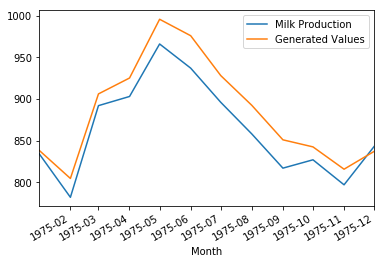

In [28]:
test_data.plot()